#### First I need to import the necessary libraries and combine all the monthly sales data to a single datframe

In [1]:
import numpy as np
import pandas as pd
import os
all_sales_data = pd.DataFrame()
files = [file for file in os.listdir('C:\py\Data Analysis with pandas#\SalesAnalysis\Sales_Data')]
print(files)
for file  in files:
    df = pd.read_csv('C:\py\Data Analysis with pandas#\SalesAnalysis\Sales_Data/' + file)
    all_sales_data = pd.concat([all_sales_data, df])
all_sales_data.to_csv('all_data.csv', index=0)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


#### Creating the month Column and others

In [2]:
all_data = pd.read_csv('all_data.csv')
all_data['month_only'] = all_data['Order Date'].str[0:2]

all_data = all_data.dropna(how ='all') # dropped the column showinf NAN
#convert month_only to string
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] #dropping Or
all_data['month_only'] = all_data['month_only'].astype('int32') 
#convert price and quantity ordered to nummeric values
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

# next is to a column called sales which is = price * quantity ordered
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_only,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### What is the month with the highest number of sales?

In [3]:
result = all_data.groupby('month_only').sum()
print(result)

            Quantity Ordered    Price Each         Sales
month_only                                              
1                      10903  1.811768e+06  1.822257e+06
2                      13449  2.188885e+06  2.202022e+06
3                      17005  2.791208e+06  2.807100e+06
4                      20558  3.367671e+06  3.390670e+06
5                      18667  3.135125e+06  3.152607e+06
6                      15253  2.562026e+06  2.577802e+06
7                      16072  2.632540e+06  2.647776e+06
8                      13448  2.230345e+06  2.244468e+06
9                      13109  2.084992e+06  2.097560e+06
10                     22703  3.715555e+06  3.736727e+06
11                     19798  3.180601e+06  3.199603e+06
12                     28114  4.588415e+06  4.613443e+06


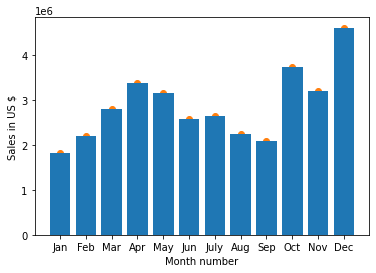

In [4]:
#plotting the data
import matplotlib.pyplot as plt
%matplotlib inline
months = range(1, 13)    
plt.bar(months, result['Sales'])
plt.scatter(months, result['Sales'])
plt.xlabel('Month number' )
plt.ylabel ('Sales in US $')
plt.xticks (months, ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Answer = December Had the Highest Sales

Why?
Probably because it was a festive periodm

#### Which city made the highest Sales?

In [5]:
####p creating a function that  city and state from purchase address
def get_city(address):
    return address.split(',')[1]
all_data['city'] = all_data['Purchase Address'].apply(lambda x: get_city(x))

def get_state(state):
    return state.split(',')[2].split(' ')[1]
all_data['city'] = all_data['city'] + ' ' + all_data['Purchase Address'].apply(lambda x: get_state(x)) 
result2 = all_data.groupby('city').sum()
result2
#all_data.head()



,Quantity Ordered,Price Each,month_only,Sales
city,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


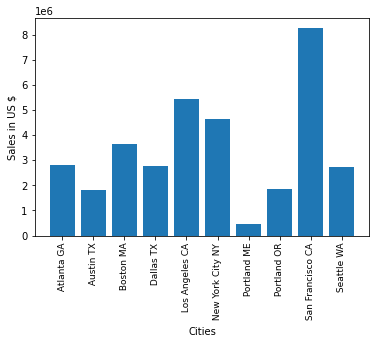

In [6]:
cities  = [city for city, df in all_data.groupby('city')]
plt.bar(cities, result2['Sales'])
plt.xlabel('Cities' )
plt.ylabel ('Sales in US $')
plt.xticks (cities, rotation = 'vertical', size = 9)
plt.show()

San Francisco CA made the greatest Sales (I'm definitely moving to San Francisco, seems like there's a lot of money there, What do you think?)

#### 3. When is the Best time to place an ad?

In [7]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_only,Sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [8]:
#pivot table for the some features

pd.pivot_table(all_data, index = 'Product', values= ['Sales', 'Quantity Ordered'], aggfunc=np.mean)


,Quantity Ordered,Sales
Product,,
20in Monitor,1.006828,110.740968
27in 4K Gaming Monitor,1.002247,390.866382
27in FHD Monitor,1.005728,150.849141
34in Ultrawide Monitor,1.002912,381.096588
AA Batteries (4-pack),1.343004,5.157137
AAA Batteries (4-pack),1.502689,4.493040
Apple Airpods Headphones,1.007203,151.080455
Bose SoundSport Headphones,1.009906,100.980520
Flatscreen TV,1.003958,301.187500


<AxesSubplot:>

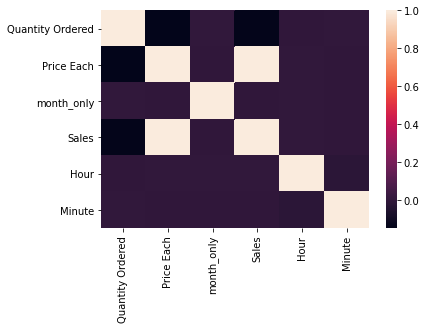

In [9]:
#getting and plotting  correlatino table of the datas
all_data.corr()
import seaborn as sns
sns.heatmap(all_data.corr())

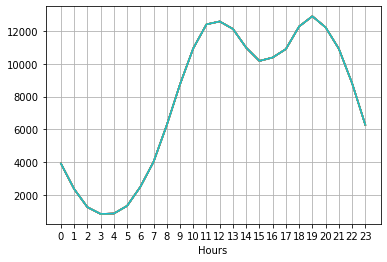

In [10]:
### ploting our sales time by clustered hour
Hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(Hours, all_data.groupby('Hour').count())
plt.xlabel('Hours')
plt.xticks(Hours)
plt.grid()
plt.show()
#anwer == around 12pm and 7pm as seen ffrom the graph belowcal

####4.  What product are most often sold together?

In [11]:
## creating a new data frame with product with only duplicated Unique ID since it mean they were bought together
df =all_data[all_data['Order ID'].duplicated(keep = False)]
#group the products in a new column
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: (',').join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_only,Sales,city,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [12]:
###Using some new libraries
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [13]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


What product sold the most and why?

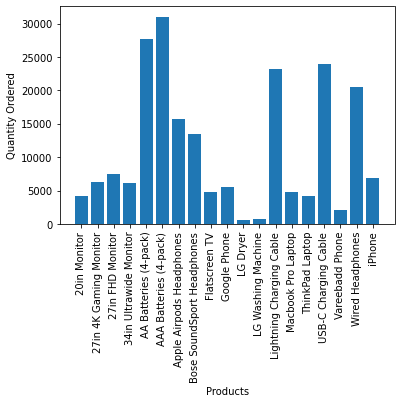

In [14]:
product_group = all_data.groupby('Product')
quantity_ordered =all_data.groupby('Product')['Quantity Ordered'].sum()
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation ='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

#### the AAA BAtteries SOld the most
why? Probably because it was he cheapest, lets check that out from the price.

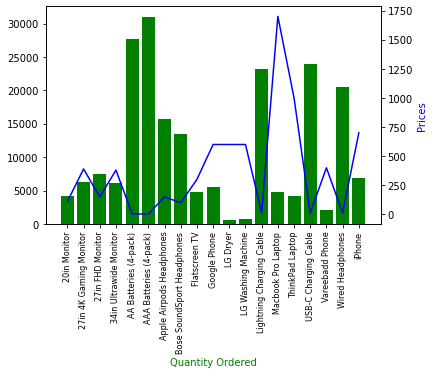

In [15]:
prices = all_data.groupby('Product').mean()['Price Each']
#creating a new plot of the prices overlaid on the above graph
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color ='g')
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Products')
ax1.set_xlabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()

In [16]:
#### so you see the higher the sales the lower the price, hypothesis correct

dooooooone

NameError: name 'dooooooone' is not defined